In [1]:
from copy import deepcopy 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
center_1=np.array([1,1])
center_2=np.array([5,5])
center_3=np.array([8,1])

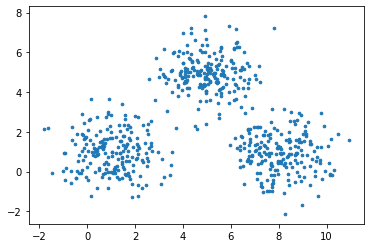

In [7]:
data_1=np.random.randn(200,2) + center_1
data_2=np.random.randn(200,2) + center_2
data_3=np.random.randn(200,2) + center_3
data=np.concatenate((data_1,data_2,data_3),axis=0)
plt.scatter(data[:,0],data[:,1],s=7)

In [9]:
k=3
n=data.shape[0]
print("n=",n)
c=data.shape[1]
print("c=",c)
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)
centers=np.random.randn(k,c)*std+mean

n= 600
c= 2


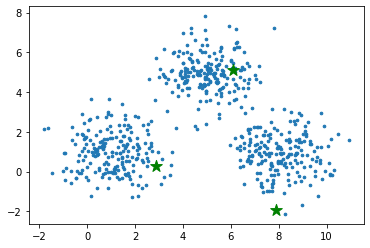

In [12]:
plt.scatter(data[:,0],data[:,1],s=7)
plt.scatter(centers[:,0],centers[:,1],marker='*',c='g',s=150)

#ffffff, #ffffff, #ffffff, #ffffff, #ffffff


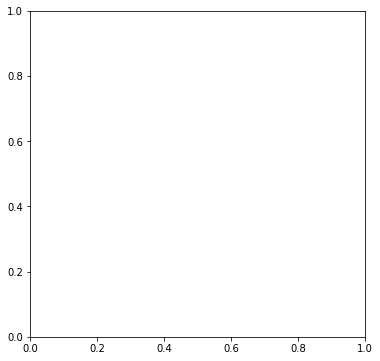

#ffffff, #ffffff, #ffffff, #ffffff, #ffffff


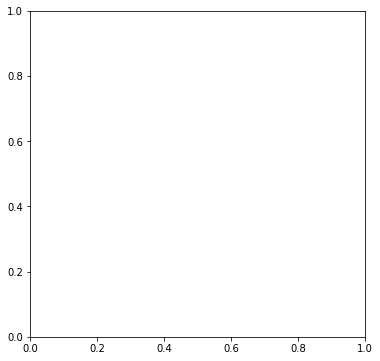

#ffffff, #ffffff, #ffffff, #ffffff, #ffffff


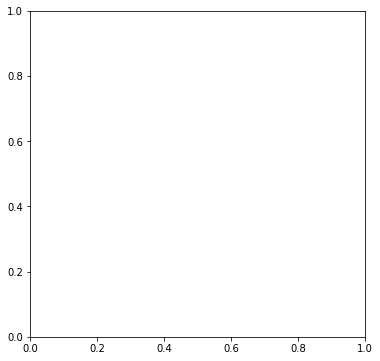

In [15]:
import matplotlib.pyplot as plt

from math import sqrt
import random
try:
  import Image
except ImportError:
  from PIL import Image





from IPython.display import Image as CImage
CImage("Image1.jpg", width=350, height=700)


class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates



class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points





class KMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters





def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))





def get_points(image_path):  
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
      
    return points





def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]

#Python map() function is used to apply a function on all the elements of specified iterable and return map object. Python map object is an iterator, so we can iterate over its elements. We can also convert map object
# to sequence objects such as list, tuple etc. using their factory functions.
  return list(map(rgb_to_hex, rgbs))





colors = get_colors('Image1.jpg', n_colors=5)
print(", ".join(colors))
fig = plt.figure(figsize=(6,6))
j = 1
for i in colors:
    circle= plt.Circle(( 0.2+(j/10) , 0.2+(j/10)) , radius= 0.1,color = i)
    fig.gca().add_artist(circle)
    j  = j+ 1
plt.show()
    
    





colors = get_colors('Image2.jpg', n_colors=5)
print(", ".join(colors))
fig = plt.figure(figsize=(6,6))
j = 1 # j is used only to adjust the position of circles in the graph
for i in colors:
    circle= plt.Circle(( 0.2+(j/10) , 0.2+(j/10)) , radius= 0.1,color = i)
    fig.gca().add_artist(circle) #gca means "get current axes". "Current" here 
   # means that it provides a handle to the last active axes. 
    #If there is no axes yet, an axes will be created.
    j  = j+ 1
plt.show()




colors = get_colors('Image3.jpg', n_colors=5)
print(", ".join(colors))
fig = plt.figure(figsize=(6,6))
j = 1
for i in colors:
    circle= plt.Circle(( 0.2+(j/10) , 0.2+(j/10)) , radius= 0.1,color = i)
    fig.gca().add_artist(circle)
    j  = j+ 1
plt.show()
